In [6]:
import requests
import pandas as pd
response = requests.get('https://cc-app.mwa.co.th/files/nginx/report.json')
data = response.json()
dataframe = pd.DataFrame(data)
df=pd.DataFrame(dataframe.loc['data']['hosts'])
df['hits_count'] = df['hits'].apply(lambda x: x['count'])
df['visitors_count'] = df['visitors'].apply(lambda x: x['count'])


# Calculate AVG Hits for each data point
df['avg_hits'] = df.describe().loc['mean']['hits_count'] / df.describe().loc['mean']['visitors_count']
# Exclude specific countries (Thailand and Ireland)
excluded_countries = ['TH Thailand', 'IE Ireland']
df_filtered = df[~df['country'].isin(excluded_countries)]
# Filter the DataFrame where hits_count is greater than avg_hits
df_filtered = df_filtered[df_filtered['hits_count'] > df_filtered['avg_hits']]
# Calculate total hits for each country
total_hits_by_country = df_filtered.groupby('country')['hits_count'].sum()
# Get the top 5 countries based on total hits and sort in descending order
top_5_countries = total_hits_by_country.nlargest(5).index
top_5_countries

Index(['Unknown', 'CA Canada'], dtype='object', name='country')

In [14]:
#Get avg hits
avg_hits = df.loc[0,'avg_hits']
avg_hits = round(avg_hits)
# Exclude specific countries (Thailand and Ireland)
excluded_countries = ['TH Thailand', 'IE Ireland']
df_filtered = df[~df['country'].isin(excluded_countries)]
# Filter the DataFrame where hits_count is greater than avg_hits
df_filtered = df_filtered[df_filtered['visitors_count'] == 0]
# Calculate total hits for each country
total_hits_by_country = df_filtered.groupby('country')['hits_count'].sum()
# Get the top 5 countries based on total hits and sort in descending order
top_5_countries = total_hits_by_country.nlargest(5).index
top_5_countries

Index([], dtype='object', name='country')

In [15]:
# Create a horizontal bar chart for each of the top 5 countries with their top 5 data points
if len(top_5_countries) == 0 :
    print('ไม่มีข้อมูล')
else : 
    fig, axes = plt.subplots(nrows=len(top_5_countries), ncols=1, figsize=(12, 4), sharex=True)
    for idx, country in enumerate(top_5_countries):
        # Filter data for the current country
        country_data = df_filtered[df_filtered['country'] == country]
        country_data


        # Get the top 5 data points for the current country and sort in descending order based on hits_count
        top_5_data = country_data.groupby('data')['hits_count'].sum().nlargest(5).sort_values(ascending=True).index
        top_5_data



        # Initialize variables for positioning
        start = 0
        gap = 0.2
        labels = []
        label_pos = np.array([])
        # Loop through the top 5 data points for the current country
        for data_point in top_5_data:
            data_point_info = country_data[country_data['data'] == data_point]
            total_hits = data_point_info['hits_count'].sum()
            # Add the country name in front of the data point label
            labels.append(f"{country} - {data_point}")
            label_pos = np.append(label_pos, start)
            # Set the positions for the bars and use red color
            axes[idx].barh(start, total_hits, color='red', height = 0.4)
            axes[idx].text(total_hits , start, f"{int(total_hits)}", ha='left', va='center')
            start += 1
        # Set the positions for the labels
        axes[idx].set_yticks(label_pos)
        # Set the labels
        axes[idx].set_yticklabels(labels, fontsize=12, color='black')
        # Set a title and axis labels for each subplot
        #axes[idx].set_title(f'Top 5 Data Points in {country} by Total Hits', fontsize=12)
    # Set a new lower position for the x-axis
    axes[-1].set_xlim(9, max(df_filtered['hits_count']) + 1)

    # Remove top and right spines for each subplot
    for ax in axes:
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
    # Set common x-axis labels
    fig.text(0.5, 0.04, 'Total Hits', ha='center', fontsize=12)
    fig.text(0.08, 0.95, '      Country          Data      ', va='top', rotation='horizontal', fontsize=12)
    # Remove grid
    for ax in axes:
        ax.grid(False)  
    plt.tight_layout(rect=[0.05, 0.05, 0.95, 0.95])
    # plt.savefig(f"./sections/NginX/Image/criticalip.png")
    plt.show()

ไม่มีข้อมูล


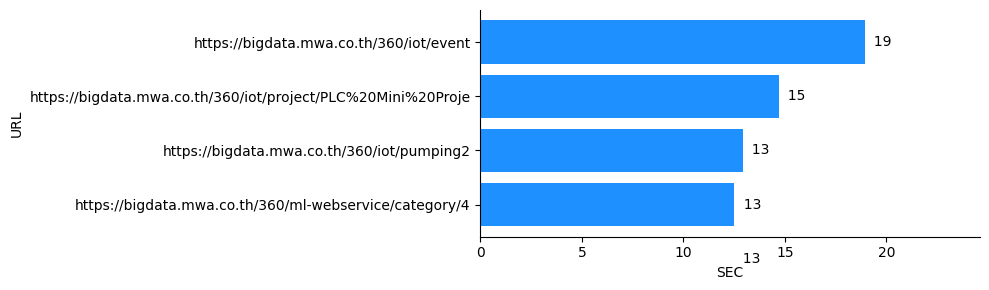

In [18]:
#Make AVG Graph
df_ge=pd.DataFrame(dataframe['general'])
total_requests = df_ge.loc['total_requests','general']
# ใช้ format()
total_requests = "{:,}".format(total_requests)
valid = df_ge.loc['valid_requests','general']
valid = "{:,}".format(valid)
failed = df_ge.loc['failed_requests','general']
failed = "{:,}".format(failed)
dataframe = pd.DataFrame(data)
df=pd.DataFrame(dataframe.loc['data']['referrers'])
df_url=pd.DataFrame(dataframe.loc['data']['referrers'])
# Assuming df is your original DataFrame
df_url['avgts_sec'] = df_url['avgts'] * 0.000001
df_url['maxts_sec'] = df_url['maxts'] * 0.000001
# ลบคอลัมน์ที่ไม่ใช่ 'data' และ 'avgts_sec'
df_cleaned = df_url[['data', 'avgts_sec']]
df_url = df_cleaned.loc[df_cleaned['data'].str.contains('bigdata')]
# เรียงลำดับ DataFrame ตามคอลัมน์ 'avgts_sec' ที่ไม่มีทศนิยม
sorted_df = df_url.sort_values(by='avgts_sec', ascending=False)
# เลือกเฉพาะ top 5 ข้อมูล
top5_df = sorted_df.head(5)
# ย่อข้อมูลในคอลัมน์ 'data' และเพิ่ม '\n' เพื่อแบ่งเป็น 2 บรรทัด
shortened_data = top5_df['data'].str[:60]
# ใช้ข้อมูลจาก DataFrame ที่เรียงลำดับและเลือกมา
avgts_sec = top5_df['avgts_sec']
# สร้างกราฟแท่งที่เป็นทิศทางตั้งและสลับตำแหน่ง x และ y และเรียงจากมากไปน้อย
fig, ax = plt.subplots(figsize=(10, 3))  # Adjust the figsize as needed
bars = ax.barh(shortened_data, avgts_sec, color='dodgerblue')
# กำหนดรูปแบบของตัวเลขที่แสดงในแกน x
def format_func(value, tick_number):
    return "{:,.0f}".format(value)
# เพิ่มป้ายกำกับแกน X
ax.set_xlabel('SEC')
# เพิ่มป้ายกำกับแกน Y
ax.set_ylabel('URL')
# เพิ่มป้ายกำกับค่าของแต่ละแท่งกราฟ
for index, value in enumerate(avgts_sec):
    ax.text(value, index, f'  {value:,.0f}', ha='left', va='center', fontsize=10)
# กลับด้านแกน Y เพื่อเรียงจากมากสุดไปน้อยสุด
ax.invert_yaxis()
# Remove the frame around the plot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)
# # Remove ticks and labels from the y-axis
# ax.tick_params(axis='y', which='both', left=False)
# ax.set_yticklabels([])
# # Remove ticks from the x-axis
# ax.tick_params(axis='x', which='both', bottom=False)
# ปรบลำดับป้ายกำกับต่าง ๆ
plt.tight_layout(rect=[0, 0, 1, 1])
# ปรับขนาดขอบเขตของกราฟ
plt.margins(x=0.3)
# บันทึกรูปภาพ
# plt.savefig(f"./sections/NginX/Image/avgrate.png")
# แสดงกราฟ
plt.show()
# 